<h1>ENB39a - CNNs</h1>
<h2>separable conv1d</h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [9]:
net1 = models.Sequential()

net1.add(layers.SeparableConv1D(filters = 96, kernel_size=8, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=4))
net1.add(layers.SeparableConv1D(filters = 48, kernel_size=4, activation='relu',))
net1.add(layers.MaxPooling1D(pool_size=4))
net1.add(layers.Flatten())
net1.add(layers.Dense(480, activation = 'relu'))
net1.add(layers.Dense(360, activation = 'relu'))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d_3 (Separabl (None, 473, 96)           720       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 118, 96)           0         
_________________________________________________________________
separable_conv1d_4 (Separabl (None, 115, 48)           5040      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 28, 48)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 480)               645600    
_________________________________________________________________
dense_5 (Dense)              (None, 360)              

In [10]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [11]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 4ms/step - loss: 1.9467 - accuracy: 0.0741 - val_loss: 1.9394 - val_accuracy: 0.3333
Epoch 2/100
54/54 [==============================] - 0s 816us/step - loss: 1.9394 - accuracy: 0.3333 - val_loss: 1.9281 - val_accuracy: 0.3333
Epoch 3/100
54/54 [==============================] - 0s 816us/step - loss: 1.9315 - accuracy: 0.2407 - val_loss: 1.9114 - val_accuracy: 0.2222
Epoch 4/100
54/54 [==============================] - 0s 816us/step - loss: 1.9182 - accuracy: 0.1667 - val_loss: 1.8897 - val_accuracy: 0.2222
Epoch 5/100
54/54 [==============================] - 0s 834us/step - loss: 1.9001 - accuracy: 0.1667 - val_loss: 1.8659 - val_accuracy: 0.2222
Epoch 6/100
54/54 [==============================] - 0s 834us/step - loss: 1.8811 - accuracy: 0.2963 - val_loss: 1.8435 - val_accuracy: 0.3333
Epoch 7/100
54/54 [==============================] - 0s 816us/step - loss: 1.8625 - accuracy: 0.35

54/54 [==============================] - 0s 778us/step - loss: 0.2516 - accuracy: 0.8889 - val_loss: 0.4683 - val_accuracy: 0.8333
Epoch 58/100
54/54 [==============================] - 0s 778us/step - loss: 0.2189 - accuracy: 0.9259 - val_loss: 0.7018 - val_accuracy: 0.7222
Epoch 59/100
54/54 [==============================] - 0s 778us/step - loss: 0.1814 - accuracy: 0.9074 - val_loss: 0.5297 - val_accuracy: 0.7222
Epoch 60/100
54/54 [==============================] - 0s 760us/step - loss: 0.2061 - accuracy: 0.9259 - val_loss: 0.4277 - val_accuracy: 0.8333
Epoch 61/100
54/54 [==============================] - 0s 778us/step - loss: 0.1859 - accuracy: 0.9444 - val_loss: 0.4766 - val_accuracy: 0.8333
Epoch 62/100
54/54 [==============================] - 0s 770us/step - loss: 0.1744 - accuracy: 0.9630 - val_loss: 0.4470 - val_accuracy: 0.8333
Epoch 63/100
54/54 [==============================] - 0s 797us/step - loss: 0.1492 - accuracy: 0.9630 - val_loss: 0.5459 - val_accuracy: 0.7222
Epoch

54/54 [==============================] - 0s 760us/step - loss: 1.7545 - accuracy: 0.1852 - val_loss: 1.7091 - val_accuracy: 0.1667
Epoch 14/100
54/54 [==============================] - 0s 741us/step - loss: 1.7060 - accuracy: 0.2407 - val_loss: 1.6613 - val_accuracy: 0.4444
Epoch 15/100
54/54 [==============================] - 0s 760us/step - loss: 1.6566 - accuracy: 0.4815 - val_loss: 1.6020 - val_accuracy: 0.6111
Epoch 16/100
54/54 [==============================] - 0s 760us/step - loss: 1.5833 - accuracy: 0.5926 - val_loss: 1.5258 - val_accuracy: 0.6111
Epoch 17/100
54/54 [==============================] - 0s 760us/step - loss: 1.5154 - accuracy: 0.5185 - val_loss: 1.4527 - val_accuracy: 0.6667
Epoch 18/100
54/54 [==============================] - 0s 797us/step - loss: 1.4304 - accuracy: 0.5741 - val_loss: 1.3875 - val_accuracy: 0.5556
Epoch 19/100
54/54 [==============================] - 0s 750us/step - loss: 1.3416 - accuracy: 0.5556 - val_loss: 1.2823 - val_accuracy: 0.6111
Epoch

Epoch 70/100
54/54 [==============================] - 0s 778us/step - loss: 0.2888 - accuracy: 0.8704 - val_loss: 0.3933 - val_accuracy: 0.8889
Epoch 71/100
54/54 [==============================] - 0s 760us/step - loss: 0.2574 - accuracy: 0.8889 - val_loss: 0.4046 - val_accuracy: 0.8889
Epoch 72/100
54/54 [==============================] - 0s 779us/step - loss: 0.2917 - accuracy: 0.8889 - val_loss: 0.4115 - val_accuracy: 0.8333
Epoch 73/100
54/54 [==============================] - 0s 778us/step - loss: 0.2610 - accuracy: 0.8889 - val_loss: 0.4013 - val_accuracy: 0.8889
Epoch 74/100
54/54 [==============================] - 0s 760us/step - loss: 0.2715 - accuracy: 0.8889 - val_loss: 0.3803 - val_accuracy: 0.8889
Epoch 75/100
54/54 [==============================] - 0s 748us/step - loss: 0.2508 - accuracy: 0.8889 - val_loss: 0.3822 - val_accuracy: 0.8889
Epoch 76/100
54/54 [==============================] - 0s 760us/step - loss: 0.2470 - accuracy: 0.8889 - val_loss: 0.3716 - val_accuracy:

54/54 [==============================] - 0s 760us/step - loss: 0.9504 - accuracy: 0.7593 - val_loss: 1.1614 - val_accuracy: 0.6111
Epoch 27/100
54/54 [==============================] - 0s 778us/step - loss: 0.9023 - accuracy: 0.7037 - val_loss: 1.1455 - val_accuracy: 0.5000
Epoch 28/100
54/54 [==============================] - 0s 783us/step - loss: 0.8587 - accuracy: 0.7407 - val_loss: 1.0520 - val_accuracy: 0.5556
Epoch 29/100
54/54 [==============================] - 0s 778us/step - loss: 0.8179 - accuracy: 0.7778 - val_loss: 0.9874 - val_accuracy: 0.6111
Epoch 30/100
54/54 [==============================] - 0s 816us/step - loss: 0.7797 - accuracy: 0.7222 - val_loss: 0.9004 - val_accuracy: 0.6111
Epoch 31/100
54/54 [==============================] - 0s 741us/step - loss: 0.7307 - accuracy: 0.7407 - val_loss: 0.7995 - val_accuracy: 0.6667
Epoch 32/100
54/54 [==============================] - 0s 760us/step - loss: 0.7170 - accuracy: 0.7222 - val_loss: 0.7958 - val_accuracy: 0.6667
Epoch

Epoch 83/100
54/54 [==============================] - 0s 797us/step - loss: 0.1260 - accuracy: 0.9444 - val_loss: 0.3545 - val_accuracy: 0.8333
Epoch 84/100
54/54 [==============================] - 0s 760us/step - loss: 0.1115 - accuracy: 0.9630 - val_loss: 0.3690 - val_accuracy: 0.8889
Epoch 85/100
54/54 [==============================] - 0s 747us/step - loss: 0.1205 - accuracy: 0.9630 - val_loss: 0.3449 - val_accuracy: 0.7778
Epoch 86/100
54/54 [==============================] - 0s 764us/step - loss: 0.1104 - accuracy: 0.9630 - val_loss: 0.3399 - val_accuracy: 0.7778
Epoch 87/100
54/54 [==============================] - 0s 732us/step - loss: 0.1025 - accuracy: 0.9630 - val_loss: 0.3915 - val_accuracy: 0.8889
Epoch 88/100
54/54 [==============================] - 0s 760us/step - loss: 0.1586 - accuracy: 0.9444 - val_loss: 0.3419 - val_accuracy: 0.8333
Epoch 89/100
54/54 [==============================] - 0s 778us/step - loss: 0.1343 - accuracy: 0.9444 - val_loss: 0.4105 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 0s 797us/step - loss: 0.5437 - accuracy: 0.8519 - val_loss: 1.0641 - val_accuracy: 0.6111
Epoch 40/100
54/54 [==============================] - 0s 778us/step - loss: 0.5188 - accuracy: 0.7963 - val_loss: 1.0105 - val_accuracy: 0.6667
Epoch 41/100
54/54 [==============================] - 0s 806us/step - loss: 0.5186 - accuracy: 0.7593 - val_loss: 0.8533 - val_accuracy: 0.6667
Epoch 42/100
54/54 [==============================] - 0s 778us/step - loss: 0.4621 - accuracy: 0.7963 - val_loss: 1.0965 - val_accuracy: 0.5000
Epoch 43/100
54/54 [==============================] - 0s 777us/step - loss: 0.4201 - accuracy: 0.9074 - val_loss: 0.8384 - val_accuracy: 0.7222
Epoch 44/100
54/54 [==============================] - 0s 797us/step - loss: 0.4690 - accuracy: 0.8519 - val_loss: 1.1495 - val_accuracy: 0.6667
Epoch 45/100
54/54 [==============================] - 0s 760us/step - loss: 0.4591 - accuracy: 0.8333 - val_loss: 1.1764 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 0s 782us/step - loss: 0.1114 - accuracy: 0.9630 - val_loss: 1.3267 - val_accuracy: 0.6667
Epoch 97/100
54/54 [==============================] - 0s 778us/step - loss: 0.0915 - accuracy: 0.9815 - val_loss: 1.3123 - val_accuracy: 0.6667
Epoch 98/100
54/54 [==============================] - 0s 760us/step - loss: 0.0789 - accuracy: 0.9630 - val_loss: 1.0529 - val_accuracy: 0.6667
Epoch 99/100
54/54 [==============================] - 0s 760us/step - loss: 0.0779 - accuracy: 0.9815 - val_loss: 1.1544 - val_accuracy: 0.7222
Epoch 100/100
15/15 [==============================] - 0s 200us/step
[0.2149459719657898, 0.9333333373069763]


In [12]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.25488209 0.95      ]
Standard deviation for loss & accuracy:  [0.08275468 0.02886751]
Duration in seconds:  18


In [31]:
net1.save('enb39a-1.h5')

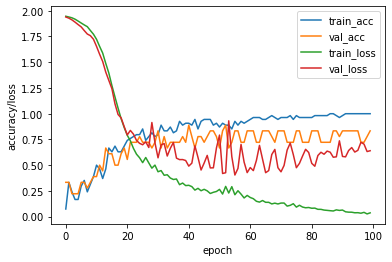

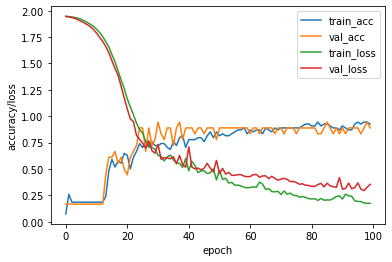

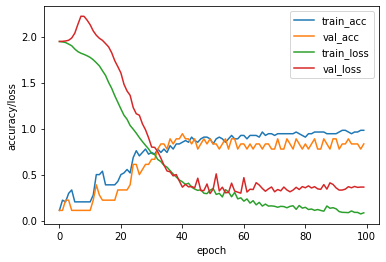

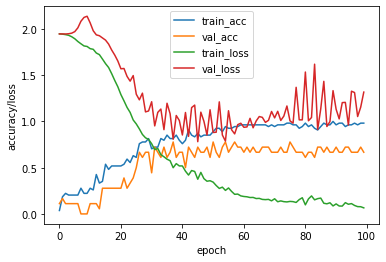

In [13]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment1a:</h2>

In [42]:
net1a = models.Sequential()

net1a.add(layers.SeparableConv1D(filters = 96, kernel_size=8, activation='relu', input_shape=(480,6)))
net1a.add(layers.MaxPooling1D(pool_size=4))
net1a.add(layers.SeparableConv1D(filters = 48, kernel_size=4, activation='relu',))
net1a.add(layers.MaxPooling1D(pool_size=4))
net1a.add(layers.Flatten())
net1a.add(layers.Dense(480, activation = 'relu'))
net1a.add(layers.Dense(360, activation = 'relu'))
net1a.add(layers.Dense(7, activation = 'softmax'))
net1a.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d_20 (Separab (None, 473, 96)           720       
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 118, 96)           0         
_________________________________________________________________
separable_conv1d_21 (Separab (None, 115, 48)           5040      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 28, 48)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 480)               645600    
_________________________________________________________________
dense_26 (Dense)             (None, 360)              

In [43]:
net1a.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1a.save_weights('net1a.h5')  # each split will start with same weights so can directly compare results

In [44]:

histories1a = []
results_list1a = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1a.load_weights('net1a.h5')
    history = net1a.fit(train_fold, train_tgt, epochs = 150, validation_data = (val_fold, val_tgt))

    histories1a.append(history)
    
    
    results = net1a.evaluate(test_data, test_labels)
    results_list1a.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1a = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/150
54/54 [==============================] - 0s 7ms/step - loss: 1.9467 - accuracy: 0.1667 - val_loss: 1.9352 - val_accuracy: 0.1111
Epoch 2/150
54/54 [==============================] - 0s 871us/step - loss: 1.9361 - accuracy: 0.1852 - val_loss: 1.9180 - val_accuracy: 0.1111
Epoch 3/150
54/54 [==============================] - 0s 853us/step - loss: 1.9242 - accuracy: 0.1852 - val_loss: 1.8947 - val_accuracy: 0.1111
Epoch 4/150
54/54 [==============================] - 0s 841us/step - loss: 1.9111 - accuracy: 0.1852 - val_loss: 1.8676 - val_accuracy: 0.1111
Epoch 5/150
54/54 [==============================] - 0s 853us/step - loss: 1.8987 - accuracy: 0.1852 - val_loss: 1.8389 - val_accuracy: 0.1111
Epoch 6/150
54/54 [==============================] - 0s 839us/step - loss: 1.8926 - accuracy: 0.1852 - val_loss: 1.8187 - val_accuracy: 0.1111
Epoch 7/150
54/54 [==============================] - 0s 827us/step - loss: 1.8954 - accuracy: 0.18

54/54 [==============================] - 0s 853us/step - loss: 0.5509 - accuracy: 0.7593 - val_loss: 1.0695 - val_accuracy: 0.6111
Epoch 58/150
54/54 [==============================] - 0s 816us/step - loss: 0.5323 - accuracy: 0.7778 - val_loss: 0.9806 - val_accuracy: 0.6111
Epoch 59/150
54/54 [==============================] - 0s 853us/step - loss: 0.5239 - accuracy: 0.8148 - val_loss: 0.9948 - val_accuracy: 0.6667
Epoch 60/150
54/54 [==============================] - 0s 834us/step - loss: 0.4987 - accuracy: 0.8333 - val_loss: 1.0690 - val_accuracy: 0.7222
Epoch 61/150
54/54 [==============================] - 0s 816us/step - loss: 0.4924 - accuracy: 0.8148 - val_loss: 1.0564 - val_accuracy: 0.7222
Epoch 62/150
54/54 [==============================] - 0s 824us/step - loss: 0.4698 - accuracy: 0.8889 - val_loss: 1.0465 - val_accuracy: 0.6667
Epoch 63/150
54/54 [==============================] - 0s 853us/step - loss: 0.4689 - accuracy: 0.8704 - val_loss: 1.0499 - val_accuracy: 0.6667
Epoch

Epoch 114/150
54/54 [==============================] - 0s 816us/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 1.7967 - val_accuracy: 0.7778
Epoch 115/150
54/54 [==============================] - 0s 834us/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 1.7131 - val_accuracy: 0.7778
Epoch 116/150
54/54 [==============================] - 0s 834us/step - loss: 0.0393 - accuracy: 1.0000 - val_loss: 1.6418 - val_accuracy: 0.7778
Epoch 117/150
54/54 [==============================] - 0s 819us/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 1.7053 - val_accuracy: 0.7778
Epoch 118/150
54/54 [==============================] - 0s 797us/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 1.8761 - val_accuracy: 0.7778
Epoch 119/150
54/54 [==============================] - 0s 834us/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 1.9008 - val_accuracy: 0.7778
Epoch 120/150
54/54 [==============================] - 0s 797us/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 1.7989 - val_ac

Epoch 20/150
54/54 [==============================] - 0s 816us/step - loss: 1.6930 - accuracy: 0.4630 - val_loss: 1.5816 - val_accuracy: 0.5000
Epoch 21/150
54/54 [==============================] - 0s 840us/step - loss: 1.6390 - accuracy: 0.5185 - val_loss: 1.4800 - val_accuracy: 0.3889
Epoch 22/150
54/54 [==============================] - 0s 834us/step - loss: 1.5601 - accuracy: 0.5185 - val_loss: 1.3894 - val_accuracy: 0.3889
Epoch 23/150
54/54 [==============================] - 0s 822us/step - loss: 1.4903 - accuracy: 0.4444 - val_loss: 1.3503 - val_accuracy: 0.3889
Epoch 24/150
54/54 [==============================] - 0s 853us/step - loss: 1.4136 - accuracy: 0.5370 - val_loss: 1.2073 - val_accuracy: 0.3889
Epoch 25/150
54/54 [==============================] - 0s 816us/step - loss: 1.3424 - accuracy: 0.4630 - val_loss: 1.1272 - val_accuracy: 0.4444
Epoch 26/150
54/54 [==============================] - 0s 834us/step - loss: 1.2698 - accuracy: 0.5741 - val_loss: 1.0562 - val_accuracy:

Epoch 77/150
54/54 [==============================] - 0s 816us/step - loss: 0.3872 - accuracy: 0.9074 - val_loss: 0.3799 - val_accuracy: 0.8889
Epoch 78/150
54/54 [==============================] - 0s 816us/step - loss: 0.3497 - accuracy: 0.8889 - val_loss: 0.3739 - val_accuracy: 0.8889
Epoch 79/150
54/54 [==============================] - 0s 797us/step - loss: 0.3516 - accuracy: 0.8889 - val_loss: 0.3311 - val_accuracy: 1.0000
Epoch 80/150
54/54 [==============================] - 0s 797us/step - loss: 0.3561 - accuracy: 0.8889 - val_loss: 0.3626 - val_accuracy: 0.9444
Epoch 81/150
54/54 [==============================] - 0s 816us/step - loss: 0.3550 - accuracy: 0.9074 - val_loss: 0.3294 - val_accuracy: 0.9444
Epoch 82/150
54/54 [==============================] - 0s 816us/step - loss: 0.3470 - accuracy: 0.8519 - val_loss: 0.3201 - val_accuracy: 1.0000
Epoch 83/150
54/54 [==============================] - 0s 816us/step - loss: 0.3219 - accuracy: 0.8519 - val_loss: 0.3784 - val_accuracy:

54/54 [==============================] - 0s 816us/step - loss: 0.1072 - accuracy: 0.9815 - val_loss: 0.1921 - val_accuracy: 1.0000
Epoch 134/150
54/54 [==============================] - 0s 834us/step - loss: 0.1042 - accuracy: 0.9815 - val_loss: 0.1930 - val_accuracy: 1.0000
Epoch 135/150
54/54 [==============================] - 0s 823us/step - loss: 0.1063 - accuracy: 0.9630 - val_loss: 0.2008 - val_accuracy: 0.8889
Epoch 136/150
54/54 [==============================] - 0s 797us/step - loss: 0.1016 - accuracy: 0.9630 - val_loss: 0.1756 - val_accuracy: 1.0000
Epoch 137/150
54/54 [==============================] - 0s 816us/step - loss: 0.0998 - accuracy: 0.9815 - val_loss: 0.1848 - val_accuracy: 1.0000
Epoch 138/150
54/54 [==============================] - 0s 816us/step - loss: 0.0933 - accuracy: 0.9815 - val_loss: 0.1853 - val_accuracy: 0.9444
Epoch 139/150
54/54 [==============================] - 0s 778us/step - loss: 0.0931 - accuracy: 0.9815 - val_loss: 0.1831 - val_accuracy: 0.9444

54/54 [==============================] - 0s 803us/step - loss: 1.2006 - accuracy: 0.5370 - val_loss: 1.5024 - val_accuracy: 0.3889
Epoch 40/150
54/54 [==============================] - 0s 816us/step - loss: 1.1663 - accuracy: 0.5556 - val_loss: 1.4791 - val_accuracy: 0.3889
Epoch 41/150
54/54 [==============================] - 0s 816us/step - loss: 1.1210 - accuracy: 0.6111 - val_loss: 1.4607 - val_accuracy: 0.2778
Epoch 42/150
54/54 [==============================] - 0s 816us/step - loss: 1.1072 - accuracy: 0.6111 - val_loss: 1.4203 - val_accuracy: 0.3889
Epoch 43/150
54/54 [==============================] - 0s 797us/step - loss: 1.0785 - accuracy: 0.6111 - val_loss: 1.3687 - val_accuracy: 0.3889
Epoch 44/150
54/54 [==============================] - 0s 816us/step - loss: 1.0472 - accuracy: 0.5556 - val_loss: 1.2919 - val_accuracy: 0.3889
Epoch 45/150
54/54 [==============================] - 0s 834us/step - loss: 1.0597 - accuracy: 0.5926 - val_loss: 1.2537 - val_accuracy: 0.3889
Epoch

Epoch 96/150
54/54 [==============================] - 0s 862us/step - loss: 0.3326 - accuracy: 0.9444 - val_loss: 0.6127 - val_accuracy: 0.5556
Epoch 97/150
54/54 [==============================] - 0s 843us/step - loss: 0.3336 - accuracy: 0.8704 - val_loss: 0.5854 - val_accuracy: 0.6111
Epoch 98/150
54/54 [==============================] - 0s 834us/step - loss: 0.3459 - accuracy: 0.9259 - val_loss: 0.4538 - val_accuracy: 0.8889
Epoch 99/150
54/54 [==============================] - 0s 871us/step - loss: 0.3058 - accuracy: 0.9444 - val_loss: 0.6837 - val_accuracy: 0.5556
Epoch 100/150
54/54 [==============================] - 0s 871us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4628 - val_accuracy: 0.8889
Epoch 101/150
54/54 [==============================] - 0s 882us/step - loss: 0.2936 - accuracy: 0.9444 - val_loss: 0.4479 - val_accuracy: 0.8333
Epoch 102/150
54/54 [==============================] - 0s 816us/step - loss: 0.2802 - accuracy: 0.9259 - val_loss: 0.5288 - val_accura

54/54 [==============================] - 0s 811us/step - loss: 1.9454 - accuracy: 0.1481 - val_loss: 1.9459 - val_accuracy: 0.0000e+00
Epoch 2/150
54/54 [==============================] - 0s 797us/step - loss: 1.9411 - accuracy: 0.2222 - val_loss: 1.9491 - val_accuracy: 0.0000e+00
Epoch 3/150
54/54 [==============================] - 0s 816us/step - loss: 1.9326 - accuracy: 0.2222 - val_loss: 1.9563 - val_accuracy: 0.0000e+00
Epoch 4/150
54/54 [==============================] - 0s 797us/step - loss: 1.9165 - accuracy: 0.2222 - val_loss: 1.9701 - val_accuracy: 0.0000e+00
Epoch 5/150
54/54 [==============================] - 0s 797us/step - loss: 1.8915 - accuracy: 0.2222 - val_loss: 2.0011 - val_accuracy: 0.0000e+00
Epoch 6/150
54/54 [==============================] - 0s 834us/step - loss: 1.8710 - accuracy: 0.2222 - val_loss: 2.0478 - val_accuracy: 0.0000e+00
Epoch 7/150
54/54 [==============================] - 0s 834us/step - loss: 1.8474 - accuracy: 0.2222 - val_loss: 2.1080 - val_accu

54/54 [==============================] - 0s 834us/step - loss: 0.4684 - accuracy: 0.8148 - val_loss: 0.7845 - val_accuracy: 0.7222
Epoch 58/150
54/54 [==============================] - 0s 824us/step - loss: 0.4809 - accuracy: 0.7778 - val_loss: 1.0283 - val_accuracy: 0.5556
Epoch 59/150
54/54 [==============================] - 0s 816us/step - loss: 0.4735 - accuracy: 0.8333 - val_loss: 0.9849 - val_accuracy: 0.6111
Epoch 60/150
54/54 [==============================] - 0s 834us/step - loss: 0.4660 - accuracy: 0.8148 - val_loss: 0.9247 - val_accuracy: 0.5556
Epoch 61/150
54/54 [==============================] - 0s 824us/step - loss: 0.4250 - accuracy: 0.8333 - val_loss: 1.0447 - val_accuracy: 0.5000
Epoch 62/150
54/54 [==============================] - 0s 834us/step - loss: 0.3715 - accuracy: 0.7963 - val_loss: 0.7978 - val_accuracy: 0.6111
Epoch 63/150
54/54 [==============================] - 0s 816us/step - loss: 0.4204 - accuracy: 0.7963 - val_loss: 0.9235 - val_accuracy: 0.6111
Epoch

Epoch 114/150
54/54 [==============================] - 0s 844us/step - loss: 0.0911 - accuracy: 0.9815 - val_loss: 1.5916 - val_accuracy: 0.5556
Epoch 115/150
54/54 [==============================] - 0s 797us/step - loss: 0.0925 - accuracy: 0.9630 - val_loss: 1.5058 - val_accuracy: 0.5556
Epoch 116/150
54/54 [==============================] - 0s 797us/step - loss: 0.0510 - accuracy: 1.0000 - val_loss: 1.2159 - val_accuracy: 0.7222
Epoch 117/150
54/54 [==============================] - 0s 816us/step - loss: 0.0627 - accuracy: 0.9815 - val_loss: 1.8477 - val_accuracy: 0.5556
Epoch 118/150
54/54 [==============================] - 0s 834us/step - loss: 0.1048 - accuracy: 0.9630 - val_loss: 1.4027 - val_accuracy: 0.6667
Epoch 119/150
54/54 [==============================] - 0s 834us/step - loss: 0.0988 - accuracy: 0.9630 - val_loss: 1.2608 - val_accuracy: 0.7222
Epoch 120/150
54/54 [==============================] - 0s 797us/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 1.9574 - val_ac

In [45]:
avg = np.mean(results_list1a, axis=0)
std_dev = np.std(results_list1a, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1a))

Average loss and accuracy scores were:  [0.20762499 0.93333334]
Standard deviation for loss & accuracy:  [0.06748581 0.04714045]
Duration in seconds:  29


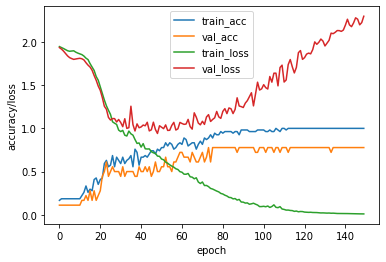

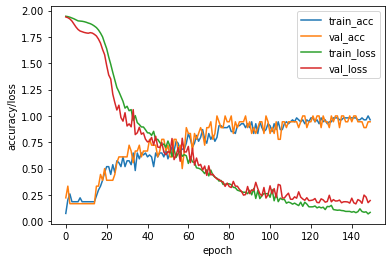

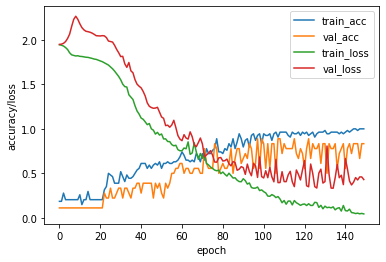

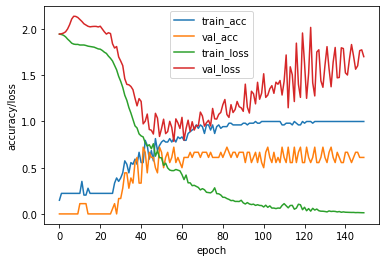

In [47]:
for history in histories1a:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [22]:
net2 = models.Sequential()
net2.add(layers.SeparableConv1D(filters = 96, kernel_size=8, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=4))
net2.add(layers.SeparableConv1D(filters = 48, kernel_size=4, activation='relu' ))
net2.add(layers.MaxPooling1D(pool_size=4))
net2.add(layers.SeparableConv1D(filters = 24, kernel_size=2, activation='relu' ))
net2.add(layers.MaxPooling1D(pool_size=4))
net2.add(layers.Flatten())
net2.add(layers.Dense(144, activation = 'relu'))
net2.add(layers.Dense(64, activation = 'relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv1d_11 (Separab (None, 473, 96)           720       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 118, 96)           0         
_________________________________________________________________
separable_conv1d_12 (Separab (None, 115, 48)           5040      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 28, 48)            0         
_________________________________________________________________
separable_conv1d_13 (Separab (None, 27, 24)            1272      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 6, 24)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)              

In [23]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [24]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 400, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/400
54/54 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1852 - val_loss: 1.9433 - val_accuracy: 0.1111
Epoch 2/400
54/54 [==============================] - 0s 861us/step - loss: 1.9439 - accuracy: 0.1481 - val_loss: 1.9400 - val_accuracy: 0.1111
Epoch 3/400
54/54 [==============================] - 0s 630us/step - loss: 1.9424 - accuracy: 0.1296 - val_loss: 1.9369 - val_accuracy: 0.1111
Epoch 4/400
54/54 [==============================] - 0s 575us/step - loss: 1.9402 - accuracy: 0.1852 - val_loss: 1.9333 - val_accuracy: 0.1111
Epoch 5/400
54/54 [==============================] - 0s 556us/step - loss: 1.9385 - accuracy: 0.1852 - val_loss: 1.9297 - val_accuracy: 0.1111
Epoch 6/400
54/54 [==============================] - 0s 556us/step - loss: 1.9357 - accuracy: 0.1852 - val_loss: 1.9262 - val_accuracy: 0.1111
Epoch 7/400
54/54 [==============================] - 0s 575us/step - loss: 1.9341 - accuracy: 0.18

54/54 [==============================] - 0s 575us/step - loss: 0.9128 - accuracy: 0.6852 - val_loss: 0.8964 - val_accuracy: 0.7222
Epoch 58/400
54/54 [==============================] - 0s 575us/step - loss: 0.8958 - accuracy: 0.7037 - val_loss: 0.8790 - val_accuracy: 0.7222
Epoch 59/400
54/54 [==============================] - 0s 556us/step - loss: 0.8767 - accuracy: 0.7222 - val_loss: 0.8945 - val_accuracy: 0.5556
Epoch 60/400
54/54 [==============================] - 0s 575us/step - loss: 0.8907 - accuracy: 0.7037 - val_loss: 0.8726 - val_accuracy: 0.7778
Epoch 61/400
54/54 [==============================] - 0s 556us/step - loss: 0.8879 - accuracy: 0.6667 - val_loss: 0.8678 - val_accuracy: 0.7222
Epoch 62/400
54/54 [==============================] - 0s 538us/step - loss: 0.8425 - accuracy: 0.7407 - val_loss: 0.9716 - val_accuracy: 0.5556
Epoch 63/400
54/54 [==============================] - 0s 538us/step - loss: 0.8489 - accuracy: 0.7037 - val_loss: 0.9512 - val_accuracy: 0.5000
Epoch

Epoch 114/400
54/54 [==============================] - 0s 538us/step - loss: 0.3225 - accuracy: 0.9259 - val_loss: 0.4912 - val_accuracy: 0.7222
Epoch 115/400
54/54 [==============================] - 0s 538us/step - loss: 0.3175 - accuracy: 0.8889 - val_loss: 0.5000 - val_accuracy: 0.6667
Epoch 116/400
54/54 [==============================] - 0s 556us/step - loss: 0.3098 - accuracy: 0.8889 - val_loss: 0.5140 - val_accuracy: 0.7778
Epoch 117/400
54/54 [==============================] - 0s 575us/step - loss: 0.2981 - accuracy: 0.9259 - val_loss: 0.5299 - val_accuracy: 0.8889
Epoch 118/400
54/54 [==============================] - 0s 538us/step - loss: 0.2899 - accuracy: 0.9259 - val_loss: 0.4964 - val_accuracy: 0.7778
Epoch 119/400
54/54 [==============================] - 0s 542us/step - loss: 0.2895 - accuracy: 0.9259 - val_loss: 0.4737 - val_accuracy: 0.7778
Epoch 120/400
54/54 [==============================] - 0s 556us/step - loss: 0.2827 - accuracy: 0.9259 - val_loss: 0.4981 - val_ac

54/54 [==============================] - 0s 556us/step - loss: 0.0793 - accuracy: 0.9815 - val_loss: 0.5761 - val_accuracy: 0.7778
Epoch 171/400
54/54 [==============================] - 0s 556us/step - loss: 0.0767 - accuracy: 0.9815 - val_loss: 0.6305 - val_accuracy: 0.7778
Epoch 172/400
54/54 [==============================] - 0s 575us/step - loss: 0.0714 - accuracy: 0.9815 - val_loss: 0.6238 - val_accuracy: 0.7778
Epoch 173/400
54/54 [==============================] - 0s 556us/step - loss: 0.0662 - accuracy: 0.9815 - val_loss: 0.6140 - val_accuracy: 0.7778
Epoch 174/400
54/54 [==============================] - 0s 556us/step - loss: 0.0698 - accuracy: 1.0000 - val_loss: 0.6126 - val_accuracy: 0.7778
Epoch 175/400
54/54 [==============================] - 0s 556us/step - loss: 0.0637 - accuracy: 1.0000 - val_loss: 0.6545 - val_accuracy: 0.7778
Epoch 176/400
54/54 [==============================] - 0s 538us/step - loss: 0.0684 - accuracy: 0.9815 - val_loss: 0.6760 - val_accuracy: 0.7778

54/54 [==============================] - 0s 556us/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.9163 - val_accuracy: 0.7778
Epoch 227/400
54/54 [==============================] - 0s 556us/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.8947 - val_accuracy: 0.7778
Epoch 228/400
54/54 [==============================] - 0s 575us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.8970 - val_accuracy: 0.7778
Epoch 229/400
54/54 [==============================] - 0s 556us/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.9111 - val_accuracy: 0.7778
Epoch 230/400
54/54 [==============================] - 0s 556us/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.9458 - val_accuracy: 0.7778
Epoch 231/400
54/54 [==============================] - 0s 575us/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.9627 - val_accuracy: 0.7222
Epoch 232/400
54/54 [==============================] - 0s 556us/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.9521 - val_accuracy: 0.7778

54/54 [==============================] - 0s 575us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.0968 - val_accuracy: 0.7778
Epoch 283/400
54/54 [==============================] - 0s 575us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.0996 - val_accuracy: 0.7778
Epoch 284/400
54/54 [==============================] - 0s 556us/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0956 - val_accuracy: 0.7778
Epoch 285/400
54/54 [==============================] - 0s 556us/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.0927 - val_accuracy: 0.7778
Epoch 286/400
54/54 [==============================] - 0s 565us/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.0918 - val_accuracy: 0.7778
Epoch 287/400
54/54 [==============================] - 0s 575us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.0985 - val_accuracy: 0.7778
Epoch 288/400
54/54 [==============================] - 0s 556us/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.1050 - val_accuracy: 0.7778

54/54 [==============================] - 0s 556us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.2126 - val_accuracy: 0.7778
Epoch 339/400
54/54 [==============================] - 0s 560us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.2094 - val_accuracy: 0.7778
Epoch 340/400
54/54 [==============================] - 0s 556us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.2081 - val_accuracy: 0.7778
Epoch 341/400
54/54 [==============================] - 0s 575us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.2106 - val_accuracy: 0.7778
Epoch 342/400
54/54 [==============================] - 0s 538us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.2149 - val_accuracy: 0.7778
Epoch 343/400
54/54 [==============================] - 0s 575us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.2238 - val_accuracy: 0.7778
Epoch 344/400
54/54 [==============================] - 0s 556us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.2262 - val_accuracy: 0.7778

54/54 [==============================] - 0s 556us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2891 - val_accuracy: 0.7222
Epoch 395/400
54/54 [==============================] - 0s 575us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2873 - val_accuracy: 0.7222
Epoch 396/400
54/54 [==============================] - 0s 586us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2892 - val_accuracy: 0.7222
Epoch 397/400
54/54 [==============================] - 0s 556us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2930 - val_accuracy: 0.7222
Epoch 398/400
54/54 [==============================] - 0s 556us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2944 - val_accuracy: 0.7222
Epoch 399/400
54/54 [==============================] - 0s 575us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2910 - val_accuracy: 0.7222
Epoch 400/400
15/15 [==============================] - 0s 267us/step
[0.569695234298706, 0.8666666746139526]
1
Train on 54 samples, validate on 

54/54 [==============================] - 0s 556us/step - loss: 1.3650 - accuracy: 0.4259 - val_loss: 1.1943 - val_accuracy: 0.3889
Epoch 51/400
54/54 [==============================] - 0s 593us/step - loss: 1.3079 - accuracy: 0.4444 - val_loss: 1.2559 - val_accuracy: 0.5000
Epoch 52/400
54/54 [==============================] - 0s 556us/step - loss: 1.2999 - accuracy: 0.6111 - val_loss: 1.1295 - val_accuracy: 0.4444
Epoch 53/400
54/54 [==============================] - 0s 552us/step - loss: 1.2086 - accuracy: 0.5741 - val_loss: 1.0914 - val_accuracy: 0.5000
Epoch 54/400
54/54 [==============================] - 0s 538us/step - loss: 1.1929 - accuracy: 0.5556 - val_loss: 1.1938 - val_accuracy: 0.4444
Epoch 55/400
54/54 [==============================] - 0s 568us/step - loss: 1.1751 - accuracy: 0.5370 - val_loss: 1.0973 - val_accuracy: 0.6111
Epoch 56/400
54/54 [==============================] - 0s 575us/step - loss: 1.1207 - accuracy: 0.5926 - val_loss: 1.0373 - val_accuracy: 0.5000
Epoch

54/54 [==============================] - 0s 606us/step - loss: 0.6259 - accuracy: 0.7963 - val_loss: 0.9577 - val_accuracy: 0.6667
Epoch 107/400
54/54 [==============================] - 0s 575us/step - loss: 0.6077 - accuracy: 0.7593 - val_loss: 0.9278 - val_accuracy: 0.6667
Epoch 108/400
54/54 [==============================] - 0s 556us/step - loss: 0.6018 - accuracy: 0.7593 - val_loss: 0.9156 - val_accuracy: 0.7222
Epoch 109/400
54/54 [==============================] - 0s 561us/step - loss: 0.6006 - accuracy: 0.7778 - val_loss: 0.9330 - val_accuracy: 0.7222
Epoch 110/400
54/54 [==============================] - 0s 575us/step - loss: 0.5912 - accuracy: 0.7593 - val_loss: 0.9604 - val_accuracy: 0.6667
Epoch 111/400
54/54 [==============================] - 0s 560us/step - loss: 0.6012 - accuracy: 0.7963 - val_loss: 0.9882 - val_accuracy: 0.6667
Epoch 112/400
54/54 [==============================] - 0s 556us/step - loss: 0.5761 - accuracy: 0.7963 - val_loss: 1.0043 - val_accuracy: 0.6667

54/54 [==============================] - 0s 556us/step - loss: 0.2827 - accuracy: 0.9074 - val_loss: 0.9034 - val_accuracy: 0.7778
Epoch 163/400
54/54 [==============================] - 0s 575us/step - loss: 0.2887 - accuracy: 0.8889 - val_loss: 0.8727 - val_accuracy: 0.7222
Epoch 164/400
54/54 [==============================] - 0s 575us/step - loss: 0.2788 - accuracy: 0.9074 - val_loss: 0.8608 - val_accuracy: 0.8333
Epoch 165/400
54/54 [==============================] - 0s 556us/step - loss: 0.2705 - accuracy: 0.8889 - val_loss: 0.8611 - val_accuracy: 0.8333
Epoch 166/400
54/54 [==============================] - 0s 556us/step - loss: 0.2710 - accuracy: 0.8889 - val_loss: 0.8828 - val_accuracy: 0.8333
Epoch 167/400
54/54 [==============================] - 0s 556us/step - loss: 0.2610 - accuracy: 0.9259 - val_loss: 0.9212 - val_accuracy: 0.7778
Epoch 168/400
54/54 [==============================] - 0s 556us/step - loss: 0.2794 - accuracy: 0.9074 - val_loss: 0.8656 - val_accuracy: 0.7778

54/54 [==============================] - 0s 556us/step - loss: 0.1440 - accuracy: 0.9630 - val_loss: 0.9618 - val_accuracy: 0.8333
Epoch 219/400
54/54 [==============================] - 0s 556us/step - loss: 0.1334 - accuracy: 0.9630 - val_loss: 0.9232 - val_accuracy: 0.8333
Epoch 220/400
54/54 [==============================] - 0s 556us/step - loss: 0.1333 - accuracy: 0.9444 - val_loss: 0.8846 - val_accuracy: 0.8889
Epoch 221/400
54/54 [==============================] - 0s 538us/step - loss: 0.1329 - accuracy: 0.9444 - val_loss: 0.9132 - val_accuracy: 0.8333
Epoch 222/400
54/54 [==============================] - 0s 556us/step - loss: 0.1294 - accuracy: 0.9630 - val_loss: 0.9477 - val_accuracy: 0.8333
Epoch 223/400
54/54 [==============================] - 0s 556us/step - loss: 0.1289 - accuracy: 0.9630 - val_loss: 0.9548 - val_accuracy: 0.8333
Epoch 224/400
54/54 [==============================] - 0s 556us/step - loss: 0.1272 - accuracy: 0.9630 - val_loss: 0.9583 - val_accuracy: 0.8333

54/54 [==============================] - 0s 556us/step - loss: 0.0817 - accuracy: 0.9630 - val_loss: 1.0433 - val_accuracy: 0.8889
Epoch 275/400
54/54 [==============================] - 0s 538us/step - loss: 0.0749 - accuracy: 0.9815 - val_loss: 1.1459 - val_accuracy: 0.8333
Epoch 276/400
54/54 [==============================] - 0s 575us/step - loss: 0.0765 - accuracy: 0.9815 - val_loss: 1.1049 - val_accuracy: 0.8333
Epoch 277/400
54/54 [==============================] - 0s 556us/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 1.0585 - val_accuracy: 0.8333
Epoch 278/400
54/54 [==============================] - 0s 575us/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 1.0190 - val_accuracy: 0.8333
Epoch 279/400
54/54 [==============================] - 0s 556us/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 1.0202 - val_accuracy: 0.8333
Epoch 280/400
54/54 [==============================] - 0s 575us/step - loss: 0.0568 - accuracy: 0.9815 - val_loss: 1.0310 - val_accuracy: 0.8333

54/54 [==============================] - 0s 556us/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 1.2431 - val_accuracy: 0.8333
Epoch 331/400
54/54 [==============================] - 0s 538us/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 1.2724 - val_accuracy: 0.8333
Epoch 332/400
54/54 [==============================] - 0s 556us/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.2810 - val_accuracy: 0.8333
Epoch 333/400
54/54 [==============================] - 0s 556us/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 1.2899 - val_accuracy: 0.8333
Epoch 334/400
54/54 [==============================] - 0s 593us/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 1.2808 - val_accuracy: 0.8333
Epoch 335/400
54/54 [==============================] - 0s 547us/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 1.2929 - val_accuracy: 0.8333
Epoch 336/400
54/54 [==============================] - 0s 556us/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 1.3105 - val_accuracy: 0.8333

54/54 [==============================] - 0s 555us/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.3974 - val_accuracy: 0.8333
Epoch 387/400
54/54 [==============================] - 0s 575us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.3897 - val_accuracy: 0.8333
Epoch 388/400
54/54 [==============================] - 0s 575us/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.3944 - val_accuracy: 0.8333
Epoch 389/400
54/54 [==============================] - 0s 538us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.4085 - val_accuracy: 0.8333
Epoch 390/400
54/54 [==============================] - 0s 556us/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4109 - val_accuracy: 0.8333
Epoch 391/400
54/54 [==============================] - 0s 560us/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.4137 - val_accuracy: 0.8333
Epoch 392/400
54/54 [==============================] - 0s 556us/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 1.4095 - val_accuracy: 0.8333

Epoch 42/400
54/54 [==============================] - 0s 575us/step - loss: 1.7995 - accuracy: 0.2407 - val_loss: 2.1254 - val_accuracy: 0.1111
Epoch 43/400
54/54 [==============================] - 0s 575us/step - loss: 1.7963 - accuracy: 0.2037 - val_loss: 2.1211 - val_accuracy: 0.1111
Epoch 44/400
54/54 [==============================] - 0s 575us/step - loss: 1.7933 - accuracy: 0.2037 - val_loss: 2.1171 - val_accuracy: 0.1667
Epoch 45/400
54/54 [==============================] - 0s 556us/step - loss: 1.7919 - accuracy: 0.3519 - val_loss: 2.1153 - val_accuracy: 0.2222
Epoch 46/400
54/54 [==============================] - 0s 556us/step - loss: 1.7857 - accuracy: 0.2778 - val_loss: 2.1088 - val_accuracy: 0.2222
Epoch 47/400
54/54 [==============================] - 0s 556us/step - loss: 1.7812 - accuracy: 0.2593 - val_loss: 2.0991 - val_accuracy: 0.1667
Epoch 48/400
54/54 [==============================] - 0s 575us/step - loss: 1.7777 - accuracy: 0.2222 - val_loss: 2.0917 - val_accuracy:

Epoch 99/400
54/54 [==============================] - 0s 556us/step - loss: 0.8156 - accuracy: 0.7037 - val_loss: 1.5151 - val_accuracy: 0.2222
Epoch 100/400
54/54 [==============================] - 0s 556us/step - loss: 0.8211 - accuracy: 0.6667 - val_loss: 1.4911 - val_accuracy: 0.3889
Epoch 101/400
54/54 [==============================] - 0s 556us/step - loss: 0.8263 - accuracy: 0.6481 - val_loss: 1.4770 - val_accuracy: 0.3889
Epoch 102/400
54/54 [==============================] - 0s 556us/step - loss: 0.7801 - accuracy: 0.6852 - val_loss: 1.4597 - val_accuracy: 0.4444
Epoch 103/400
54/54 [==============================] - 0s 575us/step - loss: 0.7839 - accuracy: 0.7407 - val_loss: 1.4853 - val_accuracy: 0.3333
Epoch 104/400
54/54 [==============================] - 0s 575us/step - loss: 0.7771 - accuracy: 0.7407 - val_loss: 1.5331 - val_accuracy: 0.5000
Epoch 105/400
54/54 [==============================] - 0s 556us/step - loss: 0.7762 - accuracy: 0.7778 - val_loss: 1.4234 - val_acc

54/54 [==============================] - 0s 575us/step - loss: 0.1669 - accuracy: 0.9444 - val_loss: 1.5972 - val_accuracy: 0.6667
Epoch 156/400
54/54 [==============================] - 0s 575us/step - loss: 0.1608 - accuracy: 0.9630 - val_loss: 1.5081 - val_accuracy: 0.6667
Epoch 157/400
54/54 [==============================] - 0s 556us/step - loss: 0.1574 - accuracy: 0.9630 - val_loss: 1.6375 - val_accuracy: 0.6667
Epoch 158/400
54/54 [==============================] - 0s 563us/step - loss: 0.1465 - accuracy: 0.9630 - val_loss: 1.6979 - val_accuracy: 0.6667
Epoch 159/400
54/54 [==============================] - 0s 556us/step - loss: 0.1460 - accuracy: 0.9630 - val_loss: 1.6722 - val_accuracy: 0.6667
Epoch 160/400
54/54 [==============================] - 0s 556us/step - loss: 0.1484 - accuracy: 0.9630 - val_loss: 1.6933 - val_accuracy: 0.6667
Epoch 161/400
54/54 [==============================] - 0s 538us/step - loss: 0.1334 - accuracy: 0.9630 - val_loss: 1.7055 - val_accuracy: 0.6667

54/54 [==============================] - 0s 575us/step - loss: 0.0490 - accuracy: 0.9815 - val_loss: 2.4283 - val_accuracy: 0.6667
Epoch 212/400
54/54 [==============================] - 0s 575us/step - loss: 0.0475 - accuracy: 0.9815 - val_loss: 2.4175 - val_accuracy: 0.6667
Epoch 213/400
54/54 [==============================] - 0s 593us/step - loss: 0.0475 - accuracy: 0.9815 - val_loss: 2.4239 - val_accuracy: 0.6667
Epoch 214/400
54/54 [==============================] - 0s 556us/step - loss: 0.0465 - accuracy: 0.9815 - val_loss: 2.4394 - val_accuracy: 0.6667
Epoch 215/400
54/54 [==============================] - 0s 556us/step - loss: 0.0460 - accuracy: 0.9815 - val_loss: 2.5212 - val_accuracy: 0.6667
Epoch 216/400
54/54 [==============================] - 0s 556us/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 2.5626 - val_accuracy: 0.6667
Epoch 217/400
54/54 [==============================] - 0s 556us/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 2.5229 - val_accuracy: 0.6667

54/54 [==============================] - 0s 556us/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 3.0699 - val_accuracy: 0.6667
Epoch 268/400
54/54 [==============================] - 0s 556us/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 3.0971 - val_accuracy: 0.6667
Epoch 269/400
54/54 [==============================] - 0s 575us/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 3.1302 - val_accuracy: 0.6667
Epoch 270/400
54/54 [==============================] - 0s 556us/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 3.1550 - val_accuracy: 0.6667
Epoch 271/400
54/54 [==============================] - 0s 563us/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 3.1507 - val_accuracy: 0.6667
Epoch 272/400
54/54 [==============================] - 0s 556us/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 3.1497 - val_accuracy: 0.6667
Epoch 273/400
54/54 [==============================] - 0s 575us/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 3.1592 - val_accuracy: 0.6667

54/54 [==============================] - 0s 575us/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 3.5193 - val_accuracy: 0.6667
Epoch 324/400
54/54 [==============================] - 0s 575us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 3.5183 - val_accuracy: 0.6667
Epoch 325/400
54/54 [==============================] - 0s 538us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 3.5037 - val_accuracy: 0.6667
Epoch 326/400
54/54 [==============================] - 0s 538us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 3.4910 - val_accuracy: 0.6667
Epoch 327/400
54/54 [==============================] - 0s 575us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 3.5090 - val_accuracy: 0.6667
Epoch 328/400
54/54 [==============================] - 0s 580us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.5113 - val_accuracy: 0.6667
Epoch 329/400
54/54 [==============================] - 0s 556us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.5148 - val_accuracy: 0.6667

54/54 [==============================] - 0s 556us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.6513 - val_accuracy: 0.6111
Epoch 380/400
54/54 [==============================] - 0s 575us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.6601 - val_accuracy: 0.6111
Epoch 381/400
54/54 [==============================] - 0s 556us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.6620 - val_accuracy: 0.6111
Epoch 382/400
54/54 [==============================] - 0s 528us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.6631 - val_accuracy: 0.6111
Epoch 383/400
54/54 [==============================] - 0s 556us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.6695 - val_accuracy: 0.6667
Epoch 384/400
54/54 [==============================] - 0s 556us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.6715 - val_accuracy: 0.6667
Epoch 385/400
54/54 [==============================] - 0s 538us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.6795 - val_accuracy: 0.6667

54/54 [==============================] - 0s 575us/step - loss: 1.8313 - accuracy: 0.2037 - val_loss: 2.0967 - val_accuracy: 0.1111
Epoch 35/400
54/54 [==============================] - 0s 556us/step - loss: 1.8301 - accuracy: 0.2037 - val_loss: 2.0997 - val_accuracy: 0.1111
Epoch 36/400
54/54 [==============================] - 0s 538us/step - loss: 1.8290 - accuracy: 0.2037 - val_loss: 2.0999 - val_accuracy: 0.1111
Epoch 37/400
54/54 [==============================] - 0s 581us/step - loss: 1.8260 - accuracy: 0.2778 - val_loss: 2.1039 - val_accuracy: 0.0556
Epoch 38/400
54/54 [==============================] - 0s 562us/step - loss: 1.8241 - accuracy: 0.3704 - val_loss: 2.1078 - val_accuracy: 0.0000e+00
Epoch 39/400
54/54 [==============================] - 0s 545us/step - loss: 1.8213 - accuracy: 0.2407 - val_loss: 2.1062 - val_accuracy: 0.0000e+00
Epoch 40/400
54/54 [==============================] - 0s 593us/step - loss: 1.8164 - accuracy: 0.2222 - val_loss: 2.1016 - val_accuracy: 0.00

Epoch 91/400
54/54 [==============================] - 0s 575us/step - loss: 0.6563 - accuracy: 0.8148 - val_loss: 2.2578 - val_accuracy: 0.4444
Epoch 92/400
54/54 [==============================] - 0s 556us/step - loss: 0.6359 - accuracy: 0.7963 - val_loss: 2.2785 - val_accuracy: 0.4444
Epoch 93/400
54/54 [==============================] - 0s 575us/step - loss: 0.6077 - accuracy: 0.8148 - val_loss: 2.2328 - val_accuracy: 0.4444
Epoch 94/400
54/54 [==============================] - 0s 556us/step - loss: 0.6019 - accuracy: 0.8333 - val_loss: 2.1959 - val_accuracy: 0.4444
Epoch 95/400
54/54 [==============================] - 0s 575us/step - loss: 0.5787 - accuracy: 0.7963 - val_loss: 2.3268 - val_accuracy: 0.4444
Epoch 96/400
54/54 [==============================] - 0s 562us/step - loss: 0.5543 - accuracy: 0.7963 - val_loss: 2.3368 - val_accuracy: 0.4444
Epoch 97/400
54/54 [==============================] - 0s 556us/step - loss: 0.5660 - accuracy: 0.8148 - val_loss: 2.2065 - val_accuracy:

54/54 [==============================] - 0s 575us/step - loss: 0.1576 - accuracy: 0.9444 - val_loss: 3.2741 - val_accuracy: 0.5000
Epoch 148/400
54/54 [==============================] - 0s 564us/step - loss: 0.1859 - accuracy: 0.9074 - val_loss: 2.8187 - val_accuracy: 0.4444
Epoch 149/400
54/54 [==============================] - 0s 556us/step - loss: 0.1798 - accuracy: 0.9630 - val_loss: 2.9833 - val_accuracy: 0.4444
Epoch 150/400
54/54 [==============================] - 0s 556us/step - loss: 0.1334 - accuracy: 0.9444 - val_loss: 3.5552 - val_accuracy: 0.5000
Epoch 151/400
54/54 [==============================] - 0s 538us/step - loss: 0.2056 - accuracy: 0.8889 - val_loss: 2.9511 - val_accuracy: 0.4444
Epoch 152/400
54/54 [==============================] - 0s 538us/step - loss: 0.2117 - accuracy: 0.9259 - val_loss: 2.9851 - val_accuracy: 0.4444
Epoch 153/400
54/54 [==============================] - 0s 556us/step - loss: 0.1435 - accuracy: 0.9444 - val_loss: 3.5239 - val_accuracy: 0.5000

54/54 [==============================] - 0s 556us/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 4.3498 - val_accuracy: 0.5000
Epoch 204/400
54/54 [==============================] - 0s 556us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 4.3468 - val_accuracy: 0.5000
Epoch 205/400
54/54 [==============================] - 0s 556us/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 4.3265 - val_accuracy: 0.5000
Epoch 206/400
54/54 [==============================] - 0s 556us/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 4.3436 - val_accuracy: 0.5000
Epoch 207/400
54/54 [==============================] - 0s 556us/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.3965 - val_accuracy: 0.5000
Epoch 208/400
54/54 [==============================] - 0s 556us/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 4.4507 - val_accuracy: 0.5000
Epoch 209/400
54/54 [==============================] - 0s 556us/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 4.4629 - val_accuracy: 0.5000

54/54 [==============================] - 0s 575us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 5.2723 - val_accuracy: 0.5000
Epoch 260/400
54/54 [==============================] - 0s 582us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 5.2816 - val_accuracy: 0.5000
Epoch 261/400
54/54 [==============================] - 0s 556us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 5.2905 - val_accuracy: 0.5000
Epoch 262/400
54/54 [==============================] - 0s 575us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 5.3057 - val_accuracy: 0.5000
Epoch 263/400
54/54 [==============================] - 0s 556us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 5.3236 - val_accuracy: 0.5000
Epoch 264/400
54/54 [==============================] - 0s 575us/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 5.3304 - val_accuracy: 0.5000
Epoch 265/400
54/54 [==============================] - 0s 556us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 5.3464 - val_accuracy: 0.5000

54/54 [==============================] - 0s 593us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.8336 - val_accuracy: 0.5000
Epoch 316/400
54/54 [==============================] - 0s 630us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.8476 - val_accuracy: 0.5000
Epoch 317/400
54/54 [==============================] - 0s 612us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.8551 - val_accuracy: 0.5000
Epoch 318/400
54/54 [==============================] - 0s 575us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.8579 - val_accuracy: 0.5000
Epoch 319/400
54/54 [==============================] - 0s 538us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.8585 - val_accuracy: 0.5000
Epoch 320/400
54/54 [==============================] - 0s 556us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.8674 - val_accuracy: 0.5000
Epoch 321/400
54/54 [==============================] - 0s 575us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 5.8786 - val_accuracy: 0.5000

54/54 [==============================] - 0s 575us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.2396 - val_accuracy: 0.5000
Epoch 372/400
54/54 [==============================] - 0s 556us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.2381 - val_accuracy: 0.5000
Epoch 373/400
54/54 [==============================] - 0s 541us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.2378 - val_accuracy: 0.5000
Epoch 374/400
54/54 [==============================] - 0s 556us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.2408 - val_accuracy: 0.5000
Epoch 375/400
54/54 [==============================] - 0s 612us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.2476 - val_accuracy: 0.5000
Epoch 376/400
54/54 [==============================] - 0s 556us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.2584 - val_accuracy: 0.5000
Epoch 377/400
54/54 [==============================] - 0s 544us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.2672 - val_accuracy: 0.5000

In [25]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [1.28677903 0.80000001]
Standard deviation for loss & accuracy:  [0.90786506 0.08164965]
Duration in seconds:  52


In [43]:
#net2.save('enb38-2.h5')

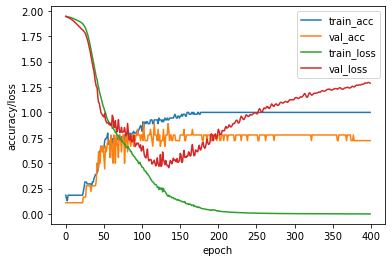

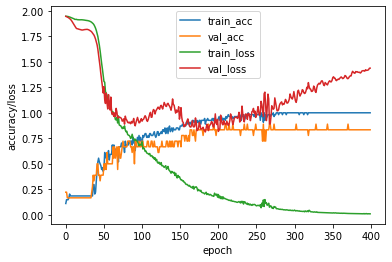

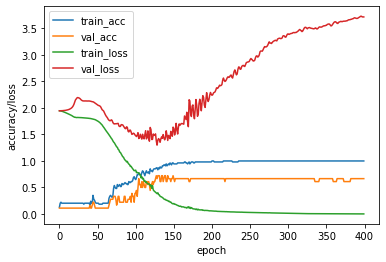

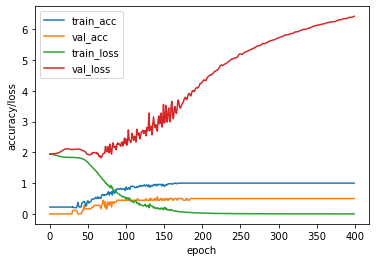

In [26]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [50]:
net3 = models.Sequential()
net3.add(layers.SeparableConv1D(filters = 96, kernel_size=8, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=4))
net3.add(layers.SeparableConv1D(filters = 48, kernel_size=4, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=4))
net3.add(layers.SeparableConv1D(filters = 24, kernel_size=2, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=4))
net3.add(layers.Flatten())
net3.add(layers.Dense(144, activation = 'relu'))
net3.add(layers.Dense(64, activation = 'relu'))
net3.add(layers.Dense(32, activation = 'relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 473, 96)           4704      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 118, 96)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 115, 48)           18480     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 28, 48)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 27, 24)            2328      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 6, 24)             0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 144)              

In [51]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 200, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/200
54/54 [==============================] - 0s 6ms/step - loss: 1.9520 - accuracy: 0.0370 - val_loss: 1.9495 - val_accuracy: 0.0556
Epoch 2/200
54/54 [==============================] - 0s 854us/step - loss: 1.9356 - accuracy: 0.1852 - val_loss: 1.9290 - val_accuracy: 0.2778
Epoch 3/200
54/54 [==============================] - 0s 593us/step - loss: 1.9237 - accuracy: 0.2407 - val_loss: 1.9134 - val_accuracy: 0.2778
Epoch 4/200
54/54 [==============================] - 0s 575us/step - loss: 1.9021 - accuracy: 0.3889 - val_loss: 1.8870 - val_accuracy: 0.3333
Epoch 5/200
54/54 [==============================] - 0s 575us/step - loss: 1.8743 - accuracy: 0.2963 - val_loss: 1.8551 - val_accuracy: 0.2778
Epoch 6/200
54/54 [==============================] - 0s 593us/step - loss: 1.8389 - accuracy: 0.2593 - val_loss: 1.8122 - val_accuracy: 0.2778
Epoch 7/200
54/54 [==============================] - 0s 593us/step - loss: 1.7921 - accuracy: 0.25

Epoch 114/200
54/54 [==============================] - 0s 569us/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 0.5084 - val_accuracy: 0.7778
Epoch 115/200
54/54 [==============================] - 0s 593us/step - loss: 0.0636 - accuracy: 0.9815 - val_loss: 0.5283 - val_accuracy: 0.7778
Epoch 116/200
54/54 [==============================] - 0s 586us/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 0.5329 - val_accuracy: 0.7778
Epoch 117/200
54/54 [==============================] - 0s 575us/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 0.5401 - val_accuracy: 0.8333
Epoch 118/200
54/54 [==============================] - 0s 579us/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.5157 - val_accuracy: 0.7778
Epoch 119/200
54/54 [==============================] - 0s 556us/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.5058 - val_accuracy: 0.7778
Epoch 120/200
54/54 [==============================] - 0s 575us/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.5008 - val_ac

Epoch 26/200
54/54 [==============================] - 0s 593us/step - loss: 0.6052 - accuracy: 0.7407 - val_loss: 0.4640 - val_accuracy: 0.9444
Epoch 27/200
54/54 [==============================] - 0s 593us/step - loss: 0.5583 - accuracy: 0.7037 - val_loss: 0.4980 - val_accuracy: 0.8889
Epoch 28/200
54/54 [==============================] - 0s 593us/step - loss: 0.5313 - accuracy: 0.7778 - val_loss: 0.4541 - val_accuracy: 0.9444
Epoch 29/200
54/54 [==============================] - 0s 630us/step - loss: 0.4837 - accuracy: 0.8704 - val_loss: 0.4368 - val_accuracy: 0.9444
Epoch 30/200
54/54 [==============================] - 0s 630us/step - loss: 0.5085 - accuracy: 0.7963 - val_loss: 0.3795 - val_accuracy: 0.9444
Epoch 31/200
54/54 [==============================] - 0s 816us/step - loss: 0.4726 - accuracy: 0.8333 - val_loss: 0.3997 - val_accuracy: 0.8333
Epoch 32/200
54/54 [==============================] - 0s 630us/step - loss: 0.4007 - accuracy: 0.8333 - val_loss: 0.3129 - val_accuracy:

Epoch 83/200
54/54 [==============================] - 0s 596us/step - loss: 0.0817 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9444
Epoch 84/200
54/54 [==============================] - 0s 593us/step - loss: 0.0878 - accuracy: 1.0000 - val_loss: 0.1741 - val_accuracy: 0.9444
Epoch 85/200
54/54 [==============================] - 0s 612us/step - loss: 0.0935 - accuracy: 0.9630 - val_loss: 0.2577 - val_accuracy: 0.9444
Epoch 86/200
54/54 [==============================] - 0s 593us/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.2830 - val_accuracy: 0.8889
Epoch 87/200
54/54 [==============================] - 0s 575us/step - loss: 0.0788 - accuracy: 1.0000 - val_loss: 0.1752 - val_accuracy: 0.8889
Epoch 88/200
54/54 [==============================] - 0s 575us/step - loss: 0.1388 - accuracy: 0.9259 - val_loss: 0.2475 - val_accuracy: 0.9444
Epoch 89/200
54/54 [==============================] - 0s 593us/step - loss: 0.0892 - accuracy: 1.0000 - val_loss: 0.4050 - val_accuracy:

54/54 [==============================] - 0s 593us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3550 - val_accuracy: 0.8333
Epoch 196/200
54/54 [==============================] - 0s 593us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 0.8333
Epoch 197/200
54/54 [==============================] - 0s 575us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3593 - val_accuracy: 0.8333
Epoch 198/200
54/54 [==============================] - 0s 593us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3937 - val_accuracy: 0.8333
Epoch 199/200
54/54 [==============================] - 0s 593us/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.8333
Epoch 200/200
15/15 [==============================] - 0s 200us/step
[0.09134892374277115, 0.9333333373069763]
2
Train on 54 samples, validate on 18 samples
Epoch 1/200
54/54 [==============================] - 0s 612us/step - loss: 1.9612 - accuracy: 0.0000e+00 - val_loss: 1.9389 - val_ac

Epoch 51/200
54/54 [==============================] - 0s 612us/step - loss: 0.4949 - accuracy: 0.7778 - val_loss: 1.1669 - val_accuracy: 0.5556
Epoch 52/200
54/54 [==============================] - 0s 612us/step - loss: 0.4256 - accuracy: 0.8519 - val_loss: 1.1935 - val_accuracy: 0.4444
Epoch 53/200
54/54 [==============================] - 0s 612us/step - loss: 0.4369 - accuracy: 0.7778 - val_loss: 1.3800 - val_accuracy: 0.3333
Epoch 54/200
54/54 [==============================] - 0s 630us/step - loss: 0.4637 - accuracy: 0.7593 - val_loss: 1.0806 - val_accuracy: 0.6667
Epoch 55/200
54/54 [==============================] - 0s 630us/step - loss: 0.4537 - accuracy: 0.8148 - val_loss: 1.3619 - val_accuracy: 0.5000
Epoch 56/200
54/54 [==============================] - 0s 630us/step - loss: 0.4125 - accuracy: 0.8333 - val_loss: 1.0427 - val_accuracy: 0.7778
Epoch 57/200
54/54 [==============================] - 0s 630us/step - loss: 0.4215 - accuracy: 0.8333 - val_loss: 1.1380 - val_accuracy:

Epoch 108/200
54/54 [==============================] - 0s 593us/step - loss: 0.1510 - accuracy: 0.9444 - val_loss: 1.1479 - val_accuracy: 0.7222
Epoch 109/200
54/54 [==============================] - 0s 593us/step - loss: 0.1456 - accuracy: 0.9444 - val_loss: 1.1524 - val_accuracy: 0.6667
Epoch 110/200
54/54 [==============================] - 0s 575us/step - loss: 0.1597 - accuracy: 0.9074 - val_loss: 1.1369 - val_accuracy: 0.6667
Epoch 111/200
54/54 [==============================] - 0s 593us/step - loss: 0.1486 - accuracy: 0.8889 - val_loss: 1.1546 - val_accuracy: 0.6667
Epoch 112/200
54/54 [==============================] - 0s 593us/step - loss: 0.1462 - accuracy: 0.9259 - val_loss: 1.1129 - val_accuracy: 0.7222
Epoch 113/200
54/54 [==============================] - 0s 593us/step - loss: 0.1541 - accuracy: 0.9074 - val_loss: 1.1364 - val_accuracy: 0.6667
Epoch 114/200
54/54 [==============================] - 0s 598us/step - loss: 0.1927 - accuracy: 0.9259 - val_loss: 1.1391 - val_ac

Epoch 20/200
54/54 [==============================] - 0s 575us/step - loss: 1.5641 - accuracy: 0.4444 - val_loss: 1.8443 - val_accuracy: 0.1111
Epoch 21/200
54/54 [==============================] - 0s 556us/step - loss: 1.5121 - accuracy: 0.4815 - val_loss: 1.7976 - val_accuracy: 0.1111
Epoch 22/200
54/54 [==============================] - 0s 575us/step - loss: 1.4407 - accuracy: 0.4815 - val_loss: 1.6900 - val_accuracy: 0.3333
Epoch 23/200
54/54 [==============================] - 0s 576us/step - loss: 1.3744 - accuracy: 0.6296 - val_loss: 1.6941 - val_accuracy: 0.3333
Epoch 24/200
54/54 [==============================] - 0s 556us/step - loss: 1.2987 - accuracy: 0.5926 - val_loss: 1.5746 - val_accuracy: 0.3333
Epoch 25/200
54/54 [==============================] - 0s 575us/step - loss: 1.2090 - accuracy: 0.5926 - val_loss: 1.6223 - val_accuracy: 0.3333
Epoch 26/200
54/54 [==============================] - 0s 575us/step - loss: 1.1223 - accuracy: 0.6296 - val_loss: 1.6048 - val_accuracy:

Epoch 77/200
54/54 [==============================] - 0s 575us/step - loss: 0.2561 - accuracy: 0.9259 - val_loss: 1.9435 - val_accuracy: 0.3889
Epoch 78/200
54/54 [==============================] - 0s 593us/step - loss: 0.2778 - accuracy: 0.9259 - val_loss: 1.4069 - val_accuracy: 0.6667
Epoch 79/200
54/54 [==============================] - 0s 593us/step - loss: 0.2650 - accuracy: 0.8519 - val_loss: 1.7348 - val_accuracy: 0.5000
Epoch 80/200
54/54 [==============================] - 0s 612us/step - loss: 0.2238 - accuracy: 0.9630 - val_loss: 1.4160 - val_accuracy: 0.6667
Epoch 81/200
54/54 [==============================] - 0s 593us/step - loss: 0.2598 - accuracy: 0.8889 - val_loss: 1.7258 - val_accuracy: 0.5000
Epoch 82/200
54/54 [==============================] - 0s 575us/step - loss: 0.2173 - accuracy: 0.9074 - val_loss: 1.6554 - val_accuracy: 0.5556
Epoch 83/200
54/54 [==============================] - 0s 593us/step - loss: 0.1436 - accuracy: 0.9815 - val_loss: 1.4174 - val_accuracy:

54/54 [==============================] - 0s 593us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.9117 - val_accuracy: 0.6667
Epoch 190/200
54/54 [==============================] - 0s 575us/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.9452 - val_accuracy: 0.6111
Epoch 191/200
54/54 [==============================] - 0s 578us/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.9936 - val_accuracy: 0.6111
Epoch 192/200
54/54 [==============================] - 0s 593us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 2.0125 - val_accuracy: 0.6111
Epoch 193/200
54/54 [==============================] - 0s 575us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.9788 - val_accuracy: 0.6111
Epoch 194/200
54/54 [==============================] - 0s 593us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.9569 - val_accuracy: 0.6111
Epoch 195/200
54/54 [==============================] - 0s 578us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.9574 - val_accuracy: 0.6111

In [52]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.32473172 0.86666667]
Standard deviation for loss & accuracy:  [0.16685649 0.04714045]
Duration in seconds:  28


In [43]:
net3.save('enb38-3.h5')

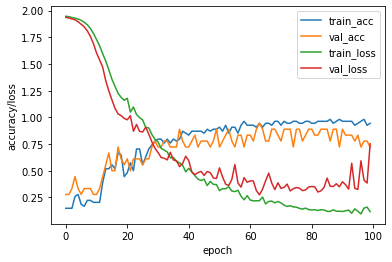

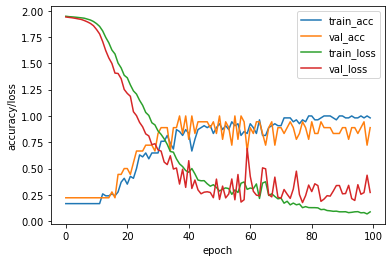

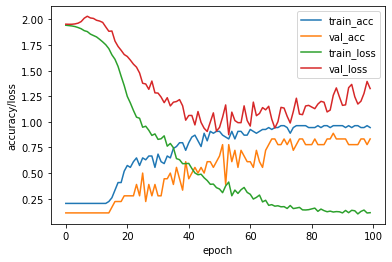

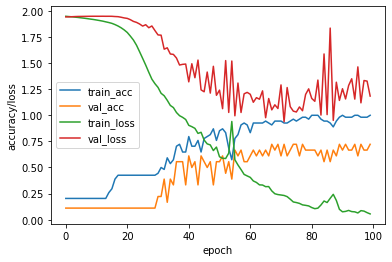

In [49]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [47]:
net4 = models.Sequential()
net4.add(layers.SeparableConv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net4.add(layers.MaxPooling1D(pool_size=16))
net4.add(layers.Flatten())
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 29, 48)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1392)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 9751      
Total params: 10,375
Trainable params: 10,375
Non-trainable params: 0
_________________________________________________________________


In [48]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 0s 3ms/step - loss: 1.9719 - accuracy: 0.0926 - val_loss: 1.9109 - val_accuracy: 0.1667
Epoch 2/100
54/54 [==============================] - 0s 222us/step - loss: 1.9261 - accuracy: 0.1667 - val_loss: 1.8722 - val_accuracy: 0.1667
Epoch 3/100
54/54 [==============================] - 0s 222us/step - loss: 1.8957 - accuracy: 0.1667 - val_loss: 1.8404 - val_accuracy: 0.1667
Epoch 4/100
54/54 [==============================] - 0s 222us/step - loss: 1.8631 - accuracy: 0.1667 - val_loss: 1.8222 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 0s 222us/step - loss: 1.8472 - accuracy: 0.1852 - val_loss: 1.8040 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 0s 204us/step - loss: 1.8348 - accuracy: 0.1852 - val_loss: 1.7850 - val_accuracy: 0.1111
Epoch 7/100
54/54 [==============================] - 0s 222us/step - loss: 1.8176 - accuracy: 0.18

54/54 [==============================] - 0s 222us/step - loss: 1.7580 - accuracy: 0.4074 - val_loss: 1.6930 - val_accuracy: 0.4444
Epoch 14/100
54/54 [==============================] - 0s 222us/step - loss: 1.7390 - accuracy: 0.3519 - val_loss: 1.6826 - val_accuracy: 0.3889
Epoch 15/100
54/54 [==============================] - 0s 204us/step - loss: 1.7188 - accuracy: 0.3889 - val_loss: 1.6700 - val_accuracy: 0.3889
Epoch 16/100
54/54 [==============================] - 0s 204us/step - loss: 1.7005 - accuracy: 0.3519 - val_loss: 1.6555 - val_accuracy: 0.3889
Epoch 17/100
54/54 [==============================] - 0s 204us/step - loss: 1.6786 - accuracy: 0.3704 - val_loss: 1.6379 - val_accuracy: 0.3889
Epoch 18/100
54/54 [==============================] - 0s 204us/step - loss: 1.6536 - accuracy: 0.4074 - val_loss: 1.6149 - val_accuracy: 0.5556
Epoch 19/100
54/54 [==============================] - 0s 222us/step - loss: 1.6313 - accuracy: 0.4815 - val_loss: 1.5940 - val_accuracy: 0.6111
Epoch

Epoch 70/100
54/54 [==============================] - 0s 204us/step - loss: 0.7206 - accuracy: 0.8148 - val_loss: 0.8008 - val_accuracy: 0.9444
Epoch 71/100
54/54 [==============================] - 0s 204us/step - loss: 0.7123 - accuracy: 0.8333 - val_loss: 0.7988 - val_accuracy: 0.9444
Epoch 72/100
54/54 [==============================] - 0s 204us/step - loss: 0.7063 - accuracy: 0.8333 - val_loss: 0.7936 - val_accuracy: 0.9444
Epoch 73/100
54/54 [==============================] - 0s 204us/step - loss: 0.6962 - accuracy: 0.9074 - val_loss: 0.7802 - val_accuracy: 0.9444
Epoch 74/100
54/54 [==============================] - 0s 222us/step - loss: 0.6877 - accuracy: 0.9444 - val_loss: 0.7675 - val_accuracy: 1.0000
Epoch 75/100
54/54 [==============================] - 0s 204us/step - loss: 0.6788 - accuracy: 0.9444 - val_loss: 0.7620 - val_accuracy: 1.0000
Epoch 76/100
54/54 [==============================] - 0s 222us/step - loss: 0.6725 - accuracy: 0.9444 - val_loss: 0.7530 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 0s 222us/step - loss: 1.4435 - accuracy: 0.5556 - val_loss: 1.7980 - val_accuracy: 0.3333
Epoch 27/100
54/54 [==============================] - 0s 224us/step - loss: 1.4228 - accuracy: 0.5185 - val_loss: 1.7838 - val_accuracy: 0.2778
Epoch 28/100
54/54 [==============================] - 0s 222us/step - loss: 1.4008 - accuracy: 0.5185 - val_loss: 1.7665 - val_accuracy: 0.3333
Epoch 29/100
54/54 [==============================] - 0s 204us/step - loss: 1.3801 - accuracy: 0.5370 - val_loss: 1.7489 - val_accuracy: 0.3333
Epoch 30/100
54/54 [==============================] - 0s 222us/step - loss: 1.3584 - accuracy: 0.5926 - val_loss: 1.7304 - val_accuracy: 0.3333
Epoch 31/100
54/54 [==============================] - 0s 222us/step - loss: 1.3378 - accuracy: 0.5926 - val_loss: 1.7122 - val_accuracy: 0.3333
Epoch 32/100
54/54 [==============================] - 0s 204us/step - loss: 1.3182 - accuracy: 0.5926 - val_loss: 1.6937 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 0s 204us/step - loss: 0.6795 - accuracy: 0.8704 - val_loss: 0.9508 - val_accuracy: 0.6111
Epoch 84/100
54/54 [==============================] - 0s 204us/step - loss: 0.6696 - accuracy: 0.8704 - val_loss: 0.9402 - val_accuracy: 0.6111
Epoch 85/100
54/54 [==============================] - 0s 222us/step - loss: 0.6616 - accuracy: 0.8889 - val_loss: 0.9334 - val_accuracy: 0.6111
Epoch 86/100
54/54 [==============================] - 0s 204us/step - loss: 0.6565 - accuracy: 0.8889 - val_loss: 0.9286 - val_accuracy: 0.6111
Epoch 87/100
54/54 [==============================] - 0s 204us/step - loss: 0.6488 - accuracy: 0.8889 - val_loss: 0.9279 - val_accuracy: 0.6111
Epoch 88/100
54/54 [==============================] - 0s 204us/step - loss: 0.6451 - accuracy: 0.8889 - val_loss: 0.9201 - val_accuracy: 0.5556
Epoch 89/100
54/54 [==============================] - 0s 222us/step - loss: 0.6360 - accuracy: 0.8889 - val_loss: 0.9122 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 0s 204us/step - loss: 1.1775 - accuracy: 0.6111 - val_loss: 1.4586 - val_accuracy: 0.2778
Epoch 40/100
54/54 [==============================] - 0s 204us/step - loss: 1.1557 - accuracy: 0.6296 - val_loss: 1.4466 - val_accuracy: 0.2778
Epoch 41/100
54/54 [==============================] - 0s 204us/step - loss: 1.1369 - accuracy: 0.6296 - val_loss: 1.4362 - val_accuracy: 0.3333
Epoch 42/100
54/54 [==============================] - 0s 204us/step - loss: 1.1150 - accuracy: 0.6481 - val_loss: 1.4186 - val_accuracy: 0.3333
Epoch 43/100
54/54 [==============================] - 0s 222us/step - loss: 1.0969 - accuracy: 0.6481 - val_loss: 1.4013 - val_accuracy: 0.3333
Epoch 44/100
54/54 [==============================] - 0s 204us/step - loss: 1.0765 - accuracy: 0.6481 - val_loss: 1.3918 - val_accuracy: 0.3333
Epoch 45/100
54/54 [==============================] - 0s 204us/step - loss: 1.0583 - accuracy: 0.6481 - val_loss: 1.3758 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 0s 222us/step - loss: 0.4832 - accuracy: 0.9630 - val_loss: 0.9937 - val_accuracy: 0.6111
Epoch 97/100
54/54 [==============================] - 0s 204us/step - loss: 0.4769 - accuracy: 1.0000 - val_loss: 0.9931 - val_accuracy: 0.6111
Epoch 98/100
54/54 [==============================] - 0s 204us/step - loss: 0.4707 - accuracy: 1.0000 - val_loss: 0.9825 - val_accuracy: 0.6111
Epoch 99/100
54/54 [==============================] - 0s 204us/step - loss: 0.4636 - accuracy: 1.0000 - val_loss: 0.9790 - val_accuracy: 0.6111
Epoch 100/100
15/15 [==============================] - 0s 67us/step
[0.6206331253051758, 0.800000011920929]


In [49]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.61883736 0.80000001]
Standard deviation for loss & accuracy:  [0.05631711 0.04714045]
Duration in seconds:  5


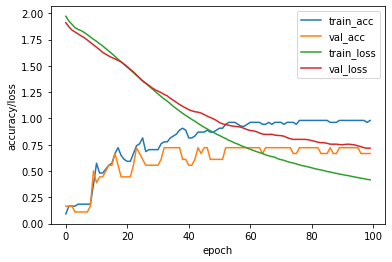

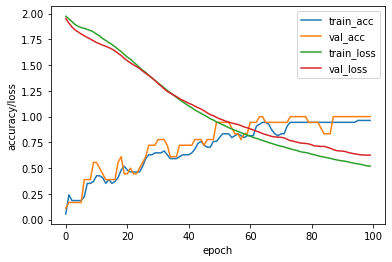

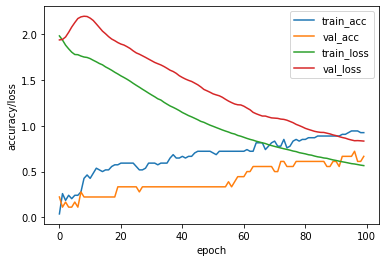

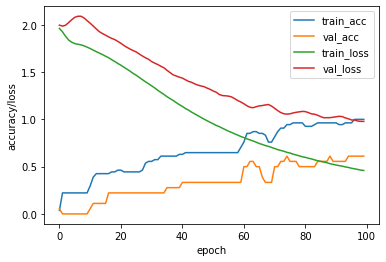

In [50]:
for history in histories4:
    pp.plot_hist(history)

In [14]:
net4.save('enb38-4.h5')

<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
